### Avant propos
Les noms « TER », au même titre que « Transilien » ou « TGV », désigne des marques commerciale appartenant à SNCF Voyageurs.

# 1.TER
Le Transport express régional, généralement désigné par le sigle TER, est une marque commerciale de SNCF Voyageurs qui s'applique aux trains et autocars qu'elle exploite dans le cadre de conventions passées avec les régions.
tous les trains de desserte régionale et locale exploités par SNCF Voyageurs sont des trains TER, **sauf en Île-de-France**, où la marque **Transilien** est utilisée, et en Corse, où ce sont les Chemins de fer de la Corse (CFC) qui gèrent le réseau de transport ferroviaire régional.
Le TER  offre trois types de services: 
1. desserte péri-urbaine 
2. desserte régionale interurbaine
3. desserte de territoires isolés


# 2.Transilien
le Transilien comme introduit plus haut  est le nom du réseau de trains de banlieue de SNCF Voyageurs desservant principalement les gares d'Île-de-France.

# 3.TGV
Le TGV (sigle de train à grande vitesse) est une rame automotrice de conception française alimentée par caténaire et propulsée par des moteurs électriques. iL se distingue des autres marques commerciales pour sa vitesse, atteignant régulièrement la vitesse de croisière de 320 km/h


## définition de la régularité

La régularité tient compte des différentes durées de trajet des clients (aussi appelée composite).

* Un train est considéré à l'heure si son retard au terminus est inférieur à 5min pour un parcours inférieur à 1h30
* Un train est considéré à l'heure si son retard au terminus est inférieur à 10min pour un parcours entre 1h30 et 3h
* Un train est considéré à l'heure si son retard au terminus est inférieur à 15min pour un parcours au-delà de 3h

**Pour être plus précis dans nos analyse,notre projet ne couvrira que la partie regularité TER**

In [1]:
# Ignorer les messages de warning
import warnings 
warnings.filterwarnings("ignore")

## I.Importation des données

In [2]:
#Lien pour recuperer les données via l'API de la SNFC
url_api="https://ressources.data.sncf.com/api/v2/catalog/datasets/regularite-mensuelle-ter/exports/json?limit=-1&offset=0&timezone=UTC"

In [3]:
#importation des librairies necessaire à la récuperation et aux traitement des données
import requests 
import pandas as pd
#recupération des données de régularité via l'API SNCF 
req = requests.get(url_api)
wb = req.json()

# normalisation du fichier json
df = pd.json_normalize(wb)
print(df.shape)
df.sort_values(by='date').head(8) #inspection des 8 premières lignes


(1825, 9)


,date,region,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,commentaires
0,2013-01,Languedoc Roussillon,5024.0,4897.0,127.0,377.0,92.301409,11.989390,Chute de neige sur le littoral.
246,2013-01,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
253,2013-01,Bretagne,8776.0,8631.0,145.0,554.0,93.581277,14.579422,Fortes chutes de neige ayant entrainé des pert...
257,2013-01,Haute Normandie,5957.0,5878.0,79.0,488.0,91.697856,11.045082,Episodes neigeux et difficultés matériels.
261,2013-01,Nord Pas de Calais,19227.0,18890.0,337.0,2332.0,87.654844,7.100343,Vol de câble à Lille Sud.
265,2013-01,Picardie,11754.0,11673.0,81.0,1245.0,89.334361,8.375904,Fortes chutes de neige ayant entrainé des pert...
243,2013-01,Champagne Ardenne,6648.0,6595.0,53.0,334.0,94.935557,18.745509,Conditions météorologiques dégradées du 15 au ...
53,2013-01,Poitou Charentes,3269.0,3134.0,135.0,205.0,93.458839,14.287805,Mouvements sociaux des agents du service comme...


**Description de la base**

Ce jeu de données porte sur la régularité des trains de la SNCF depuis janvier 2015 jusqu'au 28 octobre 2022. Il contient 1825 observations qui sont enrégistrées mensuellement et par région. Il contient 9 variables à savoir:

- **date** : YYYY-MM Année et mois pour ces résultats
- **region** : nom de la région concernée
- **nombre_de_trains_programmes** : nombre de trains programmés pour le mois 
- **nombre_de_trains_ayant_circule** : nombre de trains programmés qui ont effectivement circulé 
- **nombre_de_trains_annules** : nombre de trains programmés qui ont été annulés
- **nombre_de_trains_en_retard_a_l_arrivee** : nombre de trains retardés parmi les trains prévus (retart définie dans l'introduction au projet)
- **taux_de_regularite** : pourcentage de trains à l'heure 
- **nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee** : nombre de trains qui sont effectivement arrivés à l'heure pour 1 train annulé (par exemple : 10 trains étaient à l'heure pour 1 retardé)
- **commentaires** : divers commentaires rédigés par les gestionnaires sur les raisons du retard ou de l'annulation des trains, et des observations sur les différents indicateurs et résultats.


**Analyse de la qualité de base en vue du traitement des données**


In [4]:
#Type des variables
df.dtypes # print pour observer 

date                                                               object
region                                                             object
nombre_de_trains_programmes                                       float64
nombre_de_trains_ayant_circule                                    float64
nombre_de_trains_annules                                          float64
nombre_de_trains_en_retard_a_l_arrivee                            float64
taux_de_regularite                                                float64
nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee    float64
commentaires                                                       object
dtype: object

## 1.Gestion des typages de variables
La première variable de la base : la date , est en format objet et donne le resultat comme suit YYYY-MM --Année et mois--. On l'a mettra au format datetime de pandas et créeront les variables année et mois pour des niveaux de désagrégation plus fins qui serviront aussi bien dans le traitement que dans l'analyse.


In [5]:
#typage de la variables
df['date']=pd.to_datetime(df['date'])  #date en format datetime
df['region'] = df['region'].astype('string') #region en format string
df['commentaires'] = df['commentaires'].astype('string') #commentaire en format string

#creation des variables mois et année pour des utilisations futures 
df['annee'] = df['date'].dt.year 
df['mois'] = df['date'].dt.month 

#visualisation du resultat
df.dtypes

date                                                              datetime64[ns]
region                                                                    string
nombre_de_trains_programmes                                              float64
nombre_de_trains_ayant_circule                                           float64
nombre_de_trains_annules                                                 float64
nombre_de_trains_en_retard_a_l_arrivee                                   float64
taux_de_regularite                                                       float64
nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee           float64
commentaires                                                              string
annee                                                                      int64
mois                                                                       int64
dtype: object

## 2.Description des variables quantitatives

la base contient en grande partie des variables quantitatives qu'il est important de décrire.

       nombre_de_trains_programmes  nombre_de_trains_ayant_circule  \
count                  1788.000000                     1788.000000   
mean                  12292.477629                    12039.897651   
std                    9015.810259                     8818.687906   
min                    1129.000000                     1125.000000   
25%                    5901.500000                     5825.750000   
50%                    9474.000000                     9263.500000   
75%                   14888.000000                    14406.500000   
max                   46329.000000                    45569.000000   

       nombre_de_trains_annules  nombre_de_trains_en_retard_a_l_arrivee  \
count               1788.000000                             1788.000000   
mean                 258.276846                             1011.242729   
std                  291.916890                              837.461109   
min                    4.000000                               35.0000

<AxesSubplot: >

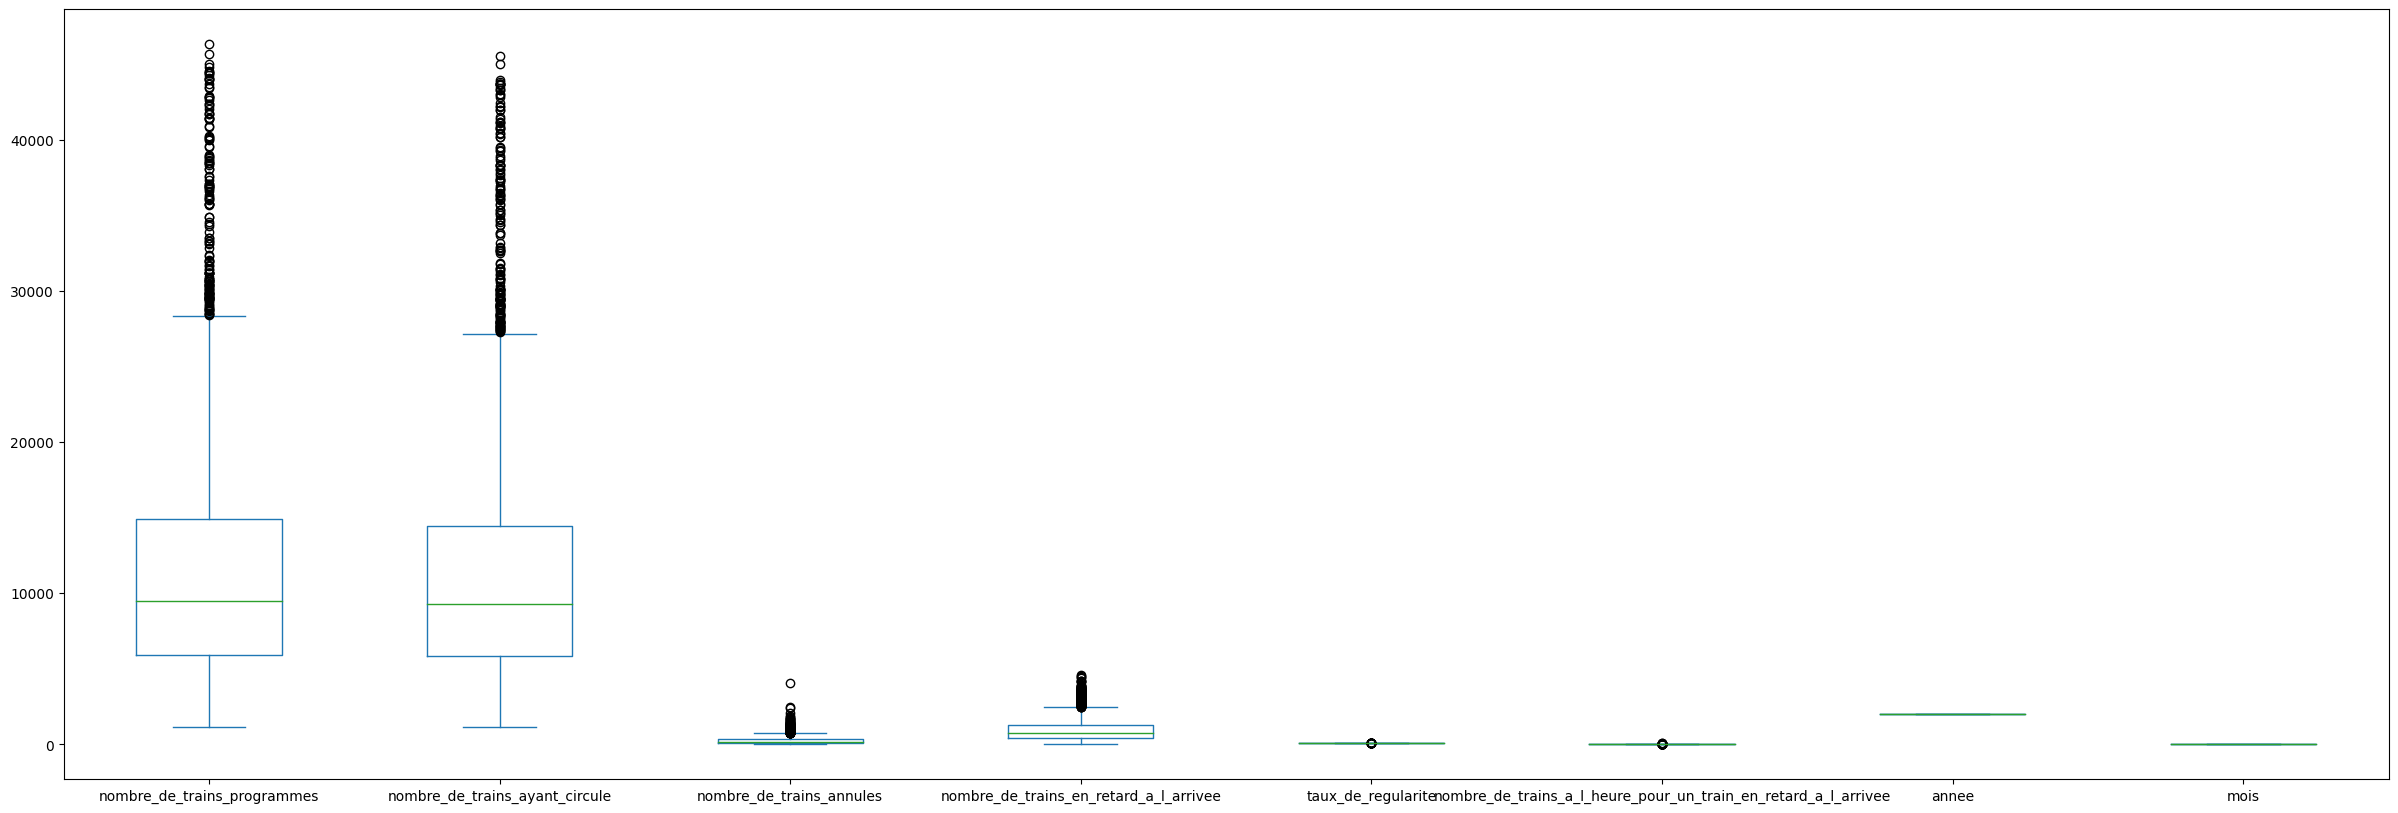

In [6]:
#quelques statistiques sur les variables quantitatives
print(df.describe())
print("La distribution des données pour chaque variables est représentée par le boxplot suivant:")
df.plot.box(figsize=(30, 10))

## 3. Gestion des donnnées manquantes


In [7]:
#nombre de manquants/valeurs nulles par variables
df.isnull().sum()

date                                                                0
region                                                              0
nombre_de_trains_programmes                                        37
nombre_de_trains_ayant_circule                                     37
nombre_de_trains_annules                                           37
nombre_de_trains_en_retard_a_l_arrivee                             37
taux_de_regularite                                                 37
nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee     37
commentaires                                                      899
annee                                                               0
mois                                                                0
dtype: int64

In [9]:
#Identification des région avec le plus de valeur NAN
df_na=df[df['nombre_de_trains_programmes'].isnull()==1]
print(df_na.shape)
print(df_na['region'].unique())
# df_na.sort_values(by='date').head(37) #utiliser ce code pour visualiser la base des na
print(df_na['commentaires'].unique())

(37, 11)
<StringArray>
['Lorraine', 'Nord Pas de Calais']
Length: 2, dtype: string
<StringArray>
["Le Président de la Région Lorraine s'est opposé, par courrier du 10 juillet 2013, à ce que SNCF transmette à l'AQST les données relatives aux trains TER lorrains en retard ou annulés, au motif qu'il n'a pas ''de visibilité sur les capacités des régions à poursuivre leurs missions d'autorité organisatrice des transports régionaux''.", <NA>]
Length: 2, dtype: string


le nombre de manquant dans la base corresponde tous à des valeurs pour les régions 'Lorraine' et 'Nord Pas de Calais'. La raison pour les manquants de loraines se trouves dans les commentaires. On remarque que l'indisponibilité des données données ter de la lorraine couvrent les 3 premières années de la base 2013,2014 et 2015. on décide de les supprimer de la base.

In [10]:
#suppression des lignes avec des valeurs manquantes
df=df.dropna(subset=['nombre_de_trains_programmes'])

## 4.Gestion du problème de reforme des régions

In [11]:
#Identification des régions présentes dans la base
list_regions=df['region'].unique()  #list des régions sous forme numpy.ndarray
print(len(list_regions))
print(list_regions)
#Nombre d'année couvert par la base
list_annee=df['annee'].unique()  #list des années sous forme numpy.ndarray
print("le nombre d'année couvertent est bien :",len(list_annee))
print("et les années couvertes sont les suivantes",list_annee)

28
<StringArray>
[      'Languedoc Roussillon',              'Midi Pyrénées',
 "Provence Alpes Côte d'Azur",                'Rhône Alpes',
                     'Alsace',              'Franche Comté',
            'Haute Normandie',                   'Auvergne',
                     'Centre',          'Champagne Ardenne',
            'Basse Normandie',                   'Limousin',
         'Nord Pas de Calais',           'Poitou Charentes',
           'Pays-de-la-Loire',                   'Picardie',
                  'Aquitaine',                   'Bretagne',
                  'Bourgogne',                   'Lorraine',
                  'Grand Est',       'Auvergne-Rhône-Alpes',
                  'Normandie',    'Bourgogne-Franche-Comté',
            'Hauts-de-France',                  'Occitanie',
         'Nouvelle Aquitaine',        'Centre Val-de-Loire']
Length: 28, dtype: string
le nombre d'année couvertent est bien : 10
et les années couvertes sont les suivantes [2013 2014 2015 2

On remarque qu'il ya 28 régions présentes tandis que la france compte actuellement et officiellement 13 régions(la Corse et l'ile de france n'étant pas couvert par cette base). Le problème se trouve au niveau de l'évolution du découpage administratif de 2013 à 2022. En effet, une reforme du découpage des régions a eu lieu en France lors de l'année 2014. Plusieurs régions ont été fusionnées si on peut le dire ainsi.


In [12]:
def evo_region (i):
    df_i=df[df['annee']==i]
    return df_i
list_annee=df['annee'].unique()
for i in list_annee :
    df_i=evo_region(i)
    print("le nombre de région à l'année ",i," est ",len(df_i['region'].unique()))

le nombre de région à l'année  2013  est  19
le nombre de région à l'année  2014  est  19
le nombre de région à l'année  2015  est  20
le nombre de région à l'année  2016  est  20
le nombre de région à l'année  2017  est  18
le nombre de région à l'année  2018  est  12
le nombre de région à l'année  2019  est  11
le nombre de région à l'année  2020  est  13
le nombre de région à l'année  2021  est  11
le nombre de région à l'année  2022  est  11


le problème ici est que souvent les anciennes dénominations des régions coincident avec les nouvelles. On importera un fichier csv contenant en 2 colonnes : les anciennes régions et leur nouvelles dénominations, et on normalisera pour n'avoir que les nouvelles dénominations dans la base.

In [13]:
#gestion du problème de nom de région
rg=pd.read_csv('Jeux de données/regions.csv',sep=";")
rg

,new_region,old_region
0,Auvergne-Rhône-Alpes,Auvergne
1,Auvergne-Rhône-Alpes,Rhône Alpes
2,Bourgogne-Franche-Comté,Bourgogne
3,Bourgogne-Franche-Comté,Franche Comté
4,Bretagne,Bretagne
5,Centre,Centre Val-de-Loire
6,Grand Est,Alsace
7,Grand Est,Champagne Ardenne
8,Grand Est,Lorraine
9,Hauts-de-France,Nord Pas de Calais


In [14]:
#vérification de la validité de la correspondance (clé de jointure) avant jointure des deux bases
old_region=list(rg['old_region'].unique())
new_region=list(rg['new_region'].unique())
print(old_region)
print(new_region)
print(list_regions)

['Auvergne', 'Rhône Alpes', 'Bourgogne', 'Franche Comté', 'Bretagne', 'Centre Val-de-Loire', 'Alsace', 'Champagne Ardenne', 'Lorraine', 'Nord Pas de Calais', 'Picardie', 'Basse Normandie', 'Haute Normandie', 'Aquitaine', 'Limousin', 'Poitou Charentes', 'Languedoc Roussillon', 'Midi Pyrénées', 'Pays-de-la-Loire', "Provence Alpes Côte d'Azur"]
['Auvergne-Rhône-Alpes ', 'Bourgogne-Franche-Comté ', 'Bretagne', 'Centre ', 'Grand Est', 'Hauts-de-France', 'Normandie', 'Nouvelle Aquitaine ', 'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur"]
<StringArray>
[      'Languedoc Roussillon',              'Midi Pyrénées',
 "Provence Alpes Côte d'Azur",                'Rhône Alpes',
                     'Alsace',              'Franche Comté',
            'Haute Normandie',                   'Auvergne',
                     'Centre',          'Champagne Ardenne',
            'Basse Normandie',                   'Limousin',
         'Nord Pas de Calais',           'Poitou Charentes',
       

In [15]:
# les valeurs dans la base importée comprendre des espaces avant et à la fin des noms des régions que l'on supprimera
def stripper(a) :
    a=a.strip()
    return a

rg['old_region']=rg['old_region'].apply(stripper)
rg['new_region']=rg['new_region'].apply(stripper)


il devrait y avoir normalement 11 régions (12 en excluant la région d'ile de France non pris en compte pour les TER) à partir de l'annnée 2015.
Pour l'année 2020, par exemple on a 13 régions en regardant de plus près, on remarque que pour la même année 2 régions qui avaient été fuusionnés lors de la reforme réapparaissent comme quoi pour certains mois on avait des données pour toutes les régions appartenant à la fusion et certains autre que pour 1 seule région. 

Par exemple en 2020 on a 13 régions au lieu de 11 ; les deux en plus sont Aquitaines inclue normalent dans Nouvelle-Aquitaines(Aquitaine+Limousin+Poitou-charentes) et centre incluant normalement dans Centre-Val de Loire(changement de nom uniquement).
On va importer un fichier csv contenant les anciennes et nouvelles régions  et faire une jointure suivie d'un group by + sum

In [16]:
#vérification du matching entre la manière d'écrire les région
for j in range(len(list_regions)) :  
    for i in range(len(old_region)) :
        old_region[i]=old_region[i].strip()
        
        if old_region[i] == list_regions[j] :
            print(old_region[i],'ok')
        

Languedoc Roussillon ok
Midi Pyrénées ok
Provence Alpes Côte d'Azur ok
Rhône Alpes ok
Alsace ok
Franche Comté ok
Haute Normandie ok
Auvergne ok
Champagne Ardenne ok
Basse Normandie ok
Limousin ok
Nord Pas de Calais ok
Poitou Charentes ok
Pays-de-la-Loire ok
Picardie ok
Aquitaine ok
Bretagne ok
Bourgogne ok
Lorraine ok
Centre Val-de-Loire ok


In [17]:
#fusion des bases 
df['region'].str.replace(' ', '')
rg['old_region'].str.replace(' ', '')
df_new=pd.merge(left=df,right=rg, how='left', left_on='region',right_on='old_region')
df_new.head(3)


,date,region,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,commentaires,annee,mois,new_region,old_region
0,2013-01-01,Languedoc Roussillon,5024.0,4897.0,127.0,377.0,92.301409,11.989390,Chute de neige sur le littoral.,2013,1,Occitanie,Languedoc Roussillon
1,2013-01-01,Midi Pyrénées,8208.0,7941.0,267.0,903.0,88.628636,7.794020,<NA>,2013,1,Occitanie,Midi Pyrénées
2,2013-01-01,Provence Alpes Côte d'Azur,13956.0,13219.0,737.0,1816.0,86.262198,6.279185,<NA>,2013,1,Provence-Alpes-Côte d'Azur,Provence Alpes Côte d'Azur


In [18]:
#gestion des noms des regions pour les observations avec déjà la même dénomination avant et après la reforme
print(len(df_new['new_region'].unique())) #on remarque que les observations avec le bon nom des régions ont pris NaN comme valeur de new_region d'où la valeur 12 en résultat de ce code

a=df_new[df_new['new_region'].isnull()==1] #on utilise une astuce pour regler le problème surtout que la base n'est pas volumineuse
a['new_region']=a['region']
b=df_new[df_new['new_region'].isnull()==0]

df_int=pd.concat([a, b]) #df_int est la base intermédiaire où on a reglé le problème de dénomination des régions
print(len(df_int['new_region'].unique())) #on otient les 11 régions donc plus de  NaN 

#verification de la base intermediaire
#df_int.sort_values(by='new_region')

12
11


# 5.obtention de la base finale
problème du nom des régions étant réglé, il reste à grouper les données par nouvelles régions (les 11).

In [19]:
df_final=df_int.groupby(['new_region','date'],as_index=False)
df_final=df_final.sum()
#df_final.head(5) #inspection dde la base obtenue

In [20]:
#recalcul du taux de régularité basé sur les 11 régions de 2013 à 2022
df_final['taux_de_regularite']=100*(df_final['nombre_de_trains_ayant_circule']-df_final['nombre_de_trains_en_retard_a_l_arrivee'])/df_final['nombre_de_trains_ayant_circule']
df_final['nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee']=(df_final['nombre_de_trains_ayant_circule']-df_final['nombre_de_trains_en_retard_a_l_arrivee'])/df_final['nombre_de_trains_en_retard_a_l_arrivee']
#restructuration des deux dernière colonnes
df_final['annee'] = df_final['date'].dt.year 
df_final['mois'] = df_final['date'].dt.month
#df_final.head(8) #inspection du


In [21]:
#agregation au niveau de toute la France (hors ile de France et Corse)
df_final_france=df_new.groupby(['date'],as_index=False)
df_final_france=df_final_france.sum()
#recalcul du taux de régularité basé sur les 11 régions de 2013 à 2022
df_final_france['taux_de_regularite']=100*(df_final_france['nombre_de_trains_ayant_circule']-df_final_france['nombre_de_trains_en_retard_a_l_arrivee'])/df_final_france['nombre_de_trains_ayant_circule']
df_final_france['nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee']=(df_final_france['nombre_de_trains_ayant_circule']-df_final_france['nombre_de_trains_en_retard_a_l_arrivee'])/df_final_france['nombre_de_trains_en_retard_a_l_arrivee']
#restructuration des deux dernière colonnes
df_final_france['annee'] = df_final_france['date'].dt.year 
df_final_france['mois'] = df_final_france['date'].dt.month
df_final_france.head(5) #inspection de la base


,date,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,annee,mois
0,2013-01-01,189899.0,186282.0,3617.0,17089.0,90.826274,9.900696,2013,1
1,2013-02-01,171409.0,168932.0,2477.0,14561.0,91.380555,10.601676,2013,2
2,2013-03-01,182332.0,176546.0,5786.0,15731.0,91.089574,10.222808,2013,3
3,2013-04-01,177483.0,174054.0,3429.0,13176.0,92.429936,12.209927,2013,4
4,2013-05-01,177082.0,174735.0,2347.0,12478.0,92.858901,13.003446,2013,5


### Traitement enfin terminé &#x1F600; on peut commencer les analyses

In [22]:
#exportation des bases finales obtenus au format csv
df_final_france.to_csv('base_regularité_france.csv') #sauvegarde en csv de la base finale 
df_final.to_csv('base_regularité_region.csv') # sauvegarde en csv de la base finale TER